<a href="https://colab.research.google.com/github/Nargiz-chess/Solar_forecasting/blob/main/Irradiance_Sydney(2012_2013)_preprocess_ninja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

from pandas import read_csv
import pandas as pd

path1=  '/content/drive/MyDrive/Master_thesis/Datasets/Weather-renewables.ninja/ninja_weather_AUS_2011.csv'
path2 = '/content/drive/MyDrive/Master_thesis/Datasets/Weather-renewables.ninja/ninja_weather_AUS_2012.csv'
path3 = '/content/drive/MyDrive/Master_thesis/Datasets/Weather-renewables.ninja/ninja_weather_AUS_2013.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ninja_2011 = read_csv(path1, header =3, index_col=1) # start from row 3 - remove previous rows because it is text, not an error 
ninja_2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 2011-01-01 11:00 to 2012-01-01 10:00
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               8760 non-null   object 
 1   radiation_surface  8760 non-null   float64
dtypes: float64(1), object(1)
memory usage: 205.3+ KB


In [ ]:
ninja_2012 = read_csv(path2, header =3,index_col=1)
ninja_2012.head(10)

,time,radiation_surface
local_time,,
2012-01-01 11:00,2012-01-01 00:00,1041.517
2012-01-01 12:00,2012-01-01 01:00,1102.061
2012-01-01 13:00,2012-01-01 02:00,1097.361
2012-01-01 14:00,2012-01-01 03:00,1027.802
2012-01-01 15:00,2012-01-01 04:00,899.326
2012-01-01 16:00,2012-01-01 05:00,721.893
2012-01-01 17:00,2012-01-01 06:00,511.427
2012-01-01 18:00,2012-01-01 07:00,285.686
2012-01-01 19:00,2012-01-01 08:00,78.842


In [ ]:
ninja_2013 = read_csv(path3, header =3,index_col=1)
ninja_2013.head(10)

,time,radiation_surface
local_time,,
2013-01-01 11:00,2013-01-01 00:00,1024.234
2013-01-01 12:00,2013-01-01 01:00,1084.880
2013-01-01 13:00,2013-01-01 02:00,1082.148
2013-01-01 14:00,2013-01-01 03:00,1015.586
2013-01-01 15:00,2013-01-01 04:00,889.572
2013-01-01 16:00,2013-01-01 05:00,715.241
2013-01-01 17:00,2013-01-01 06:00,506.267
2013-01-01 18:00,2013-01-01 07:00,282.117
2013-01-01 19:00,2013-01-01 08:00,77.085


In [ ]:
#merge years

combined = ninja_2011.append(ninja_2012)
combined.info()

combined.head()
#combined.tail()



<class 'pandas.core.frame.DataFrame'>
Index: 17544 entries, 2011-01-01 11:00 to 2013-01-01 10:00
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               17544 non-null  object 
 1   radiation_surface  17544 non-null  float64
dtypes: float64(1), object(1)
memory usage: 411.2+ KB


,time,radiation_surface
local_time,,
2011-01-01 11:00,2011-01-01 00:00,1037.543
2011-01-01 12:00,2011-01-01 01:00,1099.101
2011-01-01 13:00,2011-01-01 02:00,1095.290
2011-01-01 14:00,2011-01-01 03:00,1026.531
2011-01-01 15:00,2011-01-01 04:00,898.085


In [ ]:
combined_full = combined.append(ninja_2013)
combined_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26304 entries, 2011-01-01 11:00 to 2014-01-01 10:00
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               26304 non-null  object 
 1   radiation_surface  26304 non-null  float64
dtypes: float64(1), object(1)
memory usage: 616.5+ KB


In [ ]:
combined_full.index = pd.to_datetime(combined_full.index) 

In [ ]:
irradiance = combined_full.loc['2012-07-01 00:00' : '2013-06-30 23:00']

irradiance.head()
irradiance.tail(20)

,time,radiation_surface
local_time,,
2013-06-30 04:00:00,2013-06-29 18:00,0.000
2013-06-30 05:00:00,2013-06-29 19:00,0.000
2013-06-30 06:00:00,2013-06-29 20:00,0.000
2013-06-30 07:00:00,2013-06-29 21:00,16.520
2013-06-30 08:00:00,2013-06-29 22:00,82.227
2013-06-30 09:00:00,2013-06-29 23:00,181.026
2013-06-30 10:00:00,2013-06-30 00:00,284.155
2013-06-30 11:00:00,2013-06-30 01:00,377.279
2013-06-30 12:00:00,2013-06-30 02:00,423.853


In [ ]:
irradiance = irradiance.between_time('05:00','22:00') #local time between 5am and 10pm

In [ ]:
#save on drive as csv

irradiance_csv = irradiance.to_csv()
with open ("/content/drive/MyDrive/Master_thesis/Datasets/irradiance_AUS(2012-2013).csv", "w") as a:
  a.write(irradiance_csv)

#Visualization

In [ ]:
irraidance = pd.DataFrame(irradiance)
type(irradiance)

pandas.core.frame.DataFrame

In [ ]:
irradiance["Hour"] = irradiance.index.hour
irradiance["Month"] = irradiance.index.month

irradiance.head()

,time,radiation_surface,Hour,Month
local_time,,,,
2012-07-01 05:00:00,2012-06-30 19:00,0.000,5,7
2012-07-01 06:00:00,2012-06-30 20:00,0.000,6,7
2012-07-01 07:00:00,2012-06-30 21:00,53.377,7,7
2012-07-01 08:00:00,2012-06-30 22:00,210.825,8,7
2012-07-01 09:00:00,2012-06-30 23:00,362.929,9,7


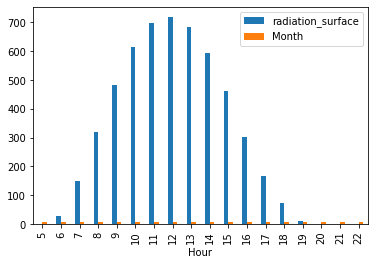

In [ ]:
import matplotlib.pyplot as plt

irradiance_hour = irradiance.groupby(irradiance["Hour"]).mean().plot(kind="bar")
plt.show(irradiance_hour)

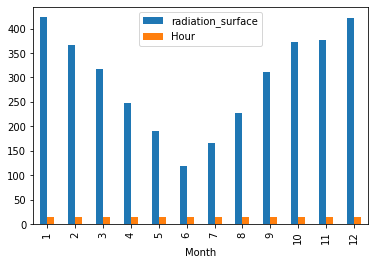

In [ ]:
irradiance_month= irradiance.groupby(irradiance["Month"]).mean().plot(kind="bar")
plt.show(irradiance_hour)